In [6]:
# To enable ploting graphs in Jupyter Notebook
# This is the instruction that we give to the jupyter server that all the plots, diagram that i am going to make
# should the part of notebook itself
# if we miss out this line then all the diagrams that we plot will appear in a pop up window it will not be the part of our notebook

%matplotlib inline

In [7]:
# Numerical libraries
import numpy as np

# importing linear regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use("classic")

# importing seaborn as statistical plots
import seaborn as sns

In [8]:
# reading the csv file into the pandas dataframe

mpg_df = pd.read_csv("car-mpg.csv")

In [9]:
mpg_df.head(50)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,0,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,0,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,0,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,0,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,0,amc ambassador dpl


## in the above data_set the [mpg] column is a target variable(y) AND other columns are the independent variable from cyl(cylinder) to car_types. that is, x1, x2, x3, ... , x8
## will exclude the car name this column does not matter in any way

In [10]:
# drop the car name column as it is useless for the model

mpg_df = mpg_df.drop("car_name", axis = 1)

In [11]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


## Here a Question we have to ask from ourselves is that are the 398 rows sufficient to capture all purmutations and combinations between the 9 columns. that leads to a particular miles per gallons. OR are the 398 rows are not sufficient to capture the actual relationship between all the attributes and the mpg column.

## Basically here we are asking from us is that do we have sufficient rows(sufficient datapoints) and to claim that we are able to capture all relationships between the dependent variable and the independent variable.

## this is known as the depth vs the breadth analysis

## if the no of columns is large but the no of data points we have is not sufficient to capture all the permutation and combination then our model will not perform well in production.

## let us assume that the 398 rows is that we have is sufficient lets move on

In [12]:
# in the origin column we have no's 1, 2, 3 these no's represent the country or the region of the origion of the cars.
# here there the 3 countries or 3 regions here 1- America, 2- Europe, 3- Asia 3 major regions where cars are manufactured.
# whenever we are dealing with a data in which we have a categorical column such as the origin the america, europe, asia
# and those columns are being assigned with numbers numerical values.we need to be careful 
# we cannot use these data blindly
# if i use this data(column) blindly to create my model the algorithm might think [1<2<3] which is actually not true 
# 1, 2, 3 are the labels given to the origin from where the cars have comed
# just like employee_id and many of the time the employee_id is a numerical value the numerical value is our unique identity.
# it cannot be used in any kind of mathematical calculations
# similarly here we code the regions values in no's as we know that particular column is actually label we need to be careful.
# other wise we will end up with the order which actually does not exists
# getting that problem in hands what we will done here is we will convert these columns to the columns which is called as
# the one hot coding columns 


In [13]:
mpg_df["origin"] = mpg_df["origin"].replace({1 : "America", 2 : "Europe", 3 : "Asia"})

In [14]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,America,0
1,15.0,8,350.0,165,3693,11.5,70,America,0
2,18.0,8,318.0,150,3436,11.0,70,America,0
3,16.0,8,304.0,150,3433,12.0,70,America,0
4,17.0,8,302.0,140,3449,10.5,70,America,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,America,1
394,44.0,4,97.0,52,2130,24.6,82,Europe,1
395,32.0,4,135.0,84,2295,11.6,82,America,1
396,28.0,4,120.0,79,2625,18.6,82,America,1


In [15]:
# convert categorical column into dummy/indicator variables. As many columns will be created as distiinct values
# this is also known as one hot coding the columns name will be america, europe and asia... with one hot coding

mpg_df = pd.get_dummies(mpg_df, columns = ["origin"])

In [16]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


In [17]:
# the adv. of one hot coding technique is that now we donot have any un wanted order in our data
# the disadv. is that from single column origin we created 3 columns
# so the no of columns created for us is equal to the no of distinct values we have in the original column
# if our column contains 300 regions then we notice that it has created 300 new columns
# this is what we call as the curse of dimensionality.
# where the no of columns in our data is too large vs the no of datapoint we have.
# when the no of data_points we have is not sufficient enough to capture all permutation and combination b/w the given columns
# then our model is tend to become overfit 

# we donot want our model to be overfit or underfit we want our model to be rightfit.
# so if we are not carefull of using this methodology of using one hot coding.
# we will endup running one hot coding on a column with too many different/ distinct values. 
# and we can end up with the situation called curse of dimensionality where the dimension is too large. 
# the no of data point is too small will represent all purmutations and combinations 
# in the situation of curse of dimensionality our model become overfit by itself

# we are here not end up with that situation we have only 398 rows and 11 columns now

In [18]:
# lets analyze the distribution of the dependent (mpg) column

mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_America,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_Asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_Europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [19]:
# we always have to do a discriptive statistical analysis for that we had used that describe statement
# transpose is not must we may or may not use transpose
# the reason why try to use transpose is all the columns comes to our left
# and their statistical info ill come at the top  
# so it become easier to under stand whats going on

In [20]:
# when we do this df.describe we will notice that the horse power column is missing
# horsepower is suppose to be a numeric column but it is not reflecting above 
# that is the clear indication of some type of data pollution in horsepower column.
# a non-numerical character is kept in the horsepower column
# hence the basic stastical calculation is not possible at that column and hence it is not reflected here

# the movement when we see that is not their when we done data df.describe. 
# that is the indication of something is wrong with that column


In [21]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [22]:
# and when we do df.dtypes -- horsepower comes up to be a object datatype that is a string datatype
# strings cannot be used for  modeling they have to be numerical types

In [23]:
# check weather HP column consist of anything else then digits
# run the isdigit() check on HP column of the mpg_df dataframe result will be true or false for every row
# capture the result in temp dataframe and do a frequency count using the value_counts()
# there are six records with non digit values in HP column

temp = pd.DataFrame(mpg_df.hp.str.isdigit()) # if the string is made of digit store true else false in the hp column
# in the temp dataframe

temp[temp["hp"] == False] # from temp take only those rows where hp has false

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [24]:
# on inspecting the record no 32, 126, etc we find "?" in the columns. Replace them with nan.
# replace them with nan and remove the records from the dataframe that have nan

mpg_df = mpg_df.replace("?", np.nan)

In [25]:
# let us see if we can get those records with nan

mpg_df[mpg_df.isnull().any(axis = 1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [26]:
# there are various ways to handle missing values drop the rows replace the missing values with median values esc.


In [27]:
# out of 398 rows 6 have nan in the hp columns we will drop those six rows. not a good idea under all situations.
# Note : HP is missing because of the nonnumeric values in the column.
# mpg_df = mpg_df.dropna()

In [28]:
# instead of droping the rows lets replace the missing values with median value

mpg_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
car_type             1.0
origin_America       1.0
origin_Asia          0.0
origin_Europe        0.0
dtype: float64

In [29]:
# replace the missing values in hp with median value of HP. Note : we do not need to spicfy the column names
# every column's missing value is replaced with the column's median respectively (axis = 0 means columnwise)

In [30]:
# mpg_df = mpg_df.fillna(mpg_df.median())


In [31]:
mpg_df = mpg_df.apply( lambda x : x.fillna(x.median()), axis = 0 )

In [32]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [33]:
mpg_df["hp"] = mpg_df["hp"].astype("float64") # converting the hp column from object/ string type to float

In [34]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                float64
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [35]:
mpg_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.530151,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.499718,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000


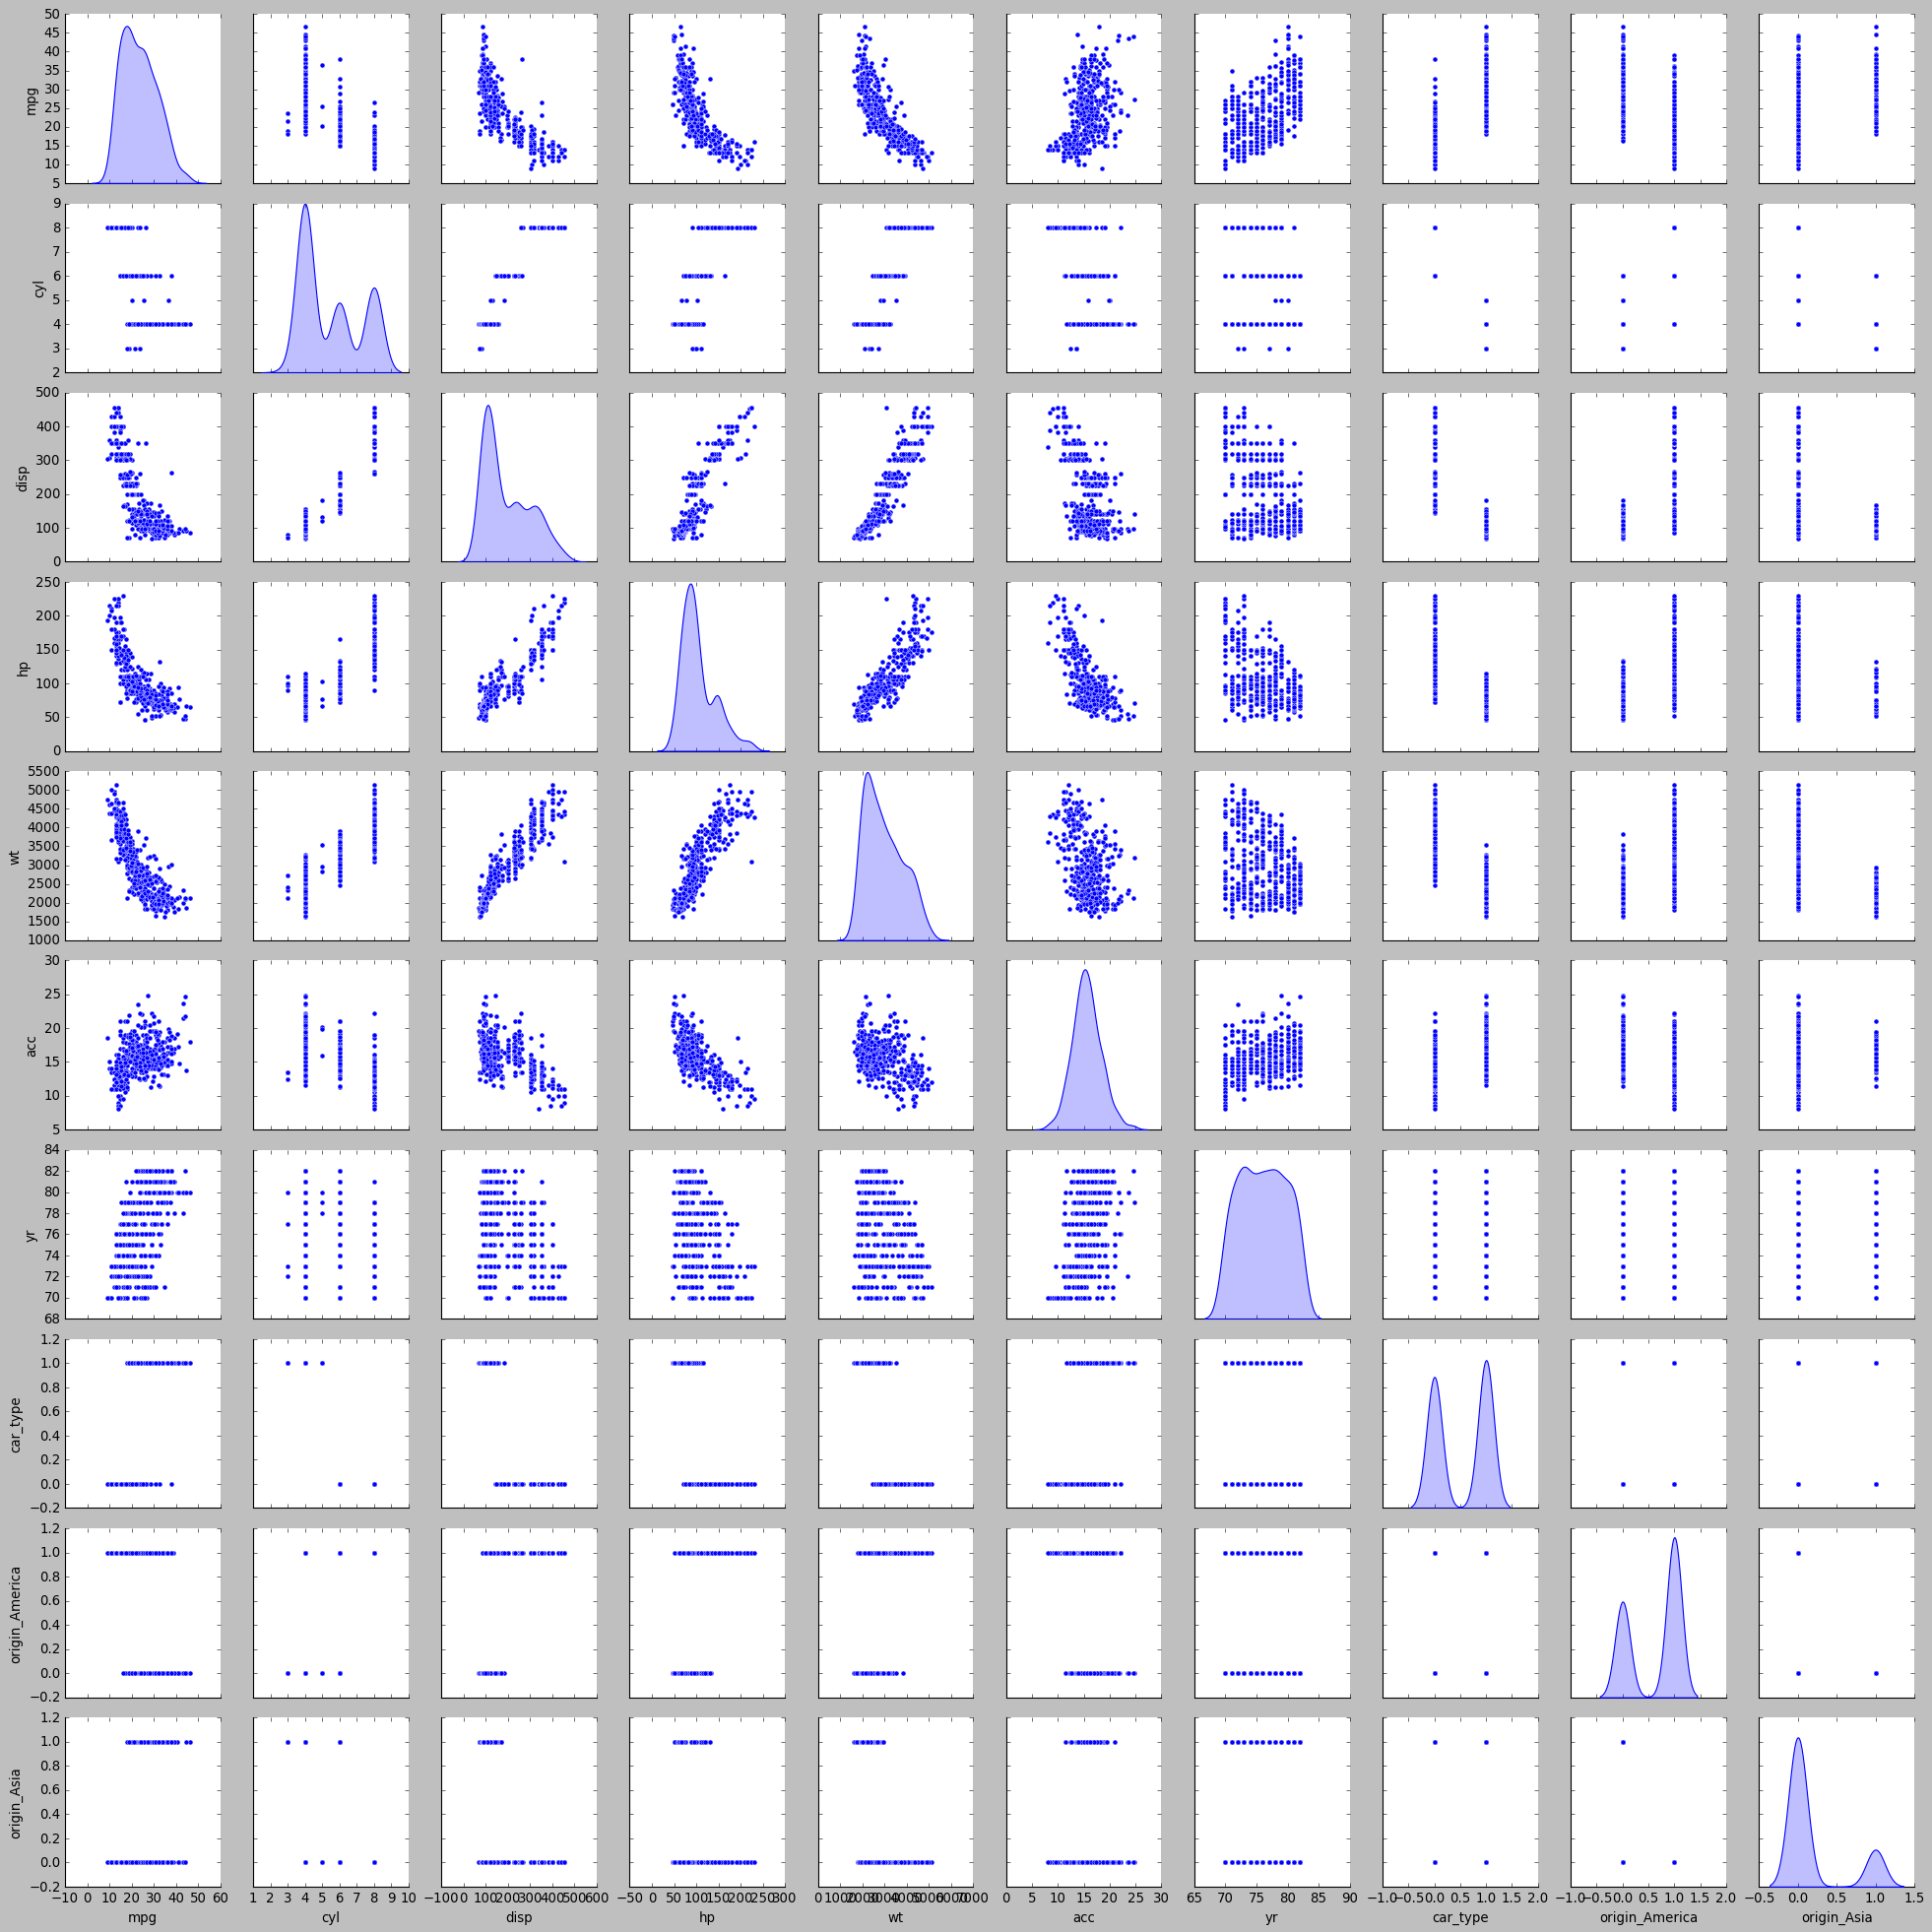

In [36]:
# let us do a co-relation analysis among the different dimensions and also each dimension with the dependent dimension
# this is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# the results can be stored as a .png file and opened in say, paint to get a larger view

mpg_df_attr = mpg_df.iloc[:, 0:10]

# axes = pd.plotting.scatter_matrix(mpg_df_attr)
# plt.tight_layout()
# plt.savefig("mpg_pairpannel.png")

sns.pairplot(mpg_df_attr, diag_kind = "kde"); # to plot density curve instead of histogram

# sns.pairplot(mpg_df_attr) # to plot histogram the default



## Pair plot is the most imp tool in the kitty of a data_scientist. I must be able to innterpret and tell what data is telling us what is the story behind the data 

## One of the skills that needs to be mastered -- for anyone to become a good data_scientist is the ability to understand the data and pairplot helps us to do that

## let us walk through this -- mpg_df pairplot 

## whenever we are doing regression we focus on off diagonals  if i was doing a classification case as we will be doing it when we are doing logistic regression then we are focusing on diagnols but right now since we are doing regression we will explore the things off the diagnol 

## and in the above pair plot that is a square matrix as many rows that many columns what is below the diagnol is the mirror image of what is above the diagonal

## so we need to look at above or below the diagnol no need to explore all of them 

## given that what we given here is the mpg column(1,1) the first thing that will hit us is that the distribution in mpg_column is almost like normal distribution

## the sec column is same as sec row, the third column is same as third row, and 4th col is same as 4th row and so on and so forth  

## (1,2) mpg vs cylinder -- what we have on x-axis is no of cylinders and on y-axis is mpg lets look at the scatter plot as the no of cylinders are increasing on x-axis we see the decrement (or downward trend) in miles per gallon as the no of cyl. increase the friction in cyl. increase friction leads to lots of loss efficiency and hence miles per gallons comes down.                         (week predictor in terms of no of cylinders )  


## (1,3) mpg vs displacement  -- what we have on x-axis is displacement and on y-axis is mpg lets look at the scatter plot as the displacement start increasing on x-axis we see the decrement (or downward trend) in miles per gallon. Displacement is how far is the piston in the engine is pushed in every cycle. so as the displacement increases the friction b/w the piston and the cylinder increase the more the friction the more drop in efficiency. and thats what we are seeing here.


## (1,4) mpg vs horsepower  -- what we have on x-axis is the horsepower and on y-axis is mpg lets look at the scatter plot as the horsepower increases on x-axis we see the decrement (or downward trend) in miles per gallon as the 


## (1,5) mpg vs weight 




## (1,6) mpg vs acceleration -- this is the intresting scatter plot . it is a plot of miles per gallon vs acceleration. (recall the concept of coeficient of co-relation there we talked about +ve and -ve areas) if we do the same analysis on the plot we will notice that both the +ve area and the -ve area almost cancle out eachother out and hence acceleration is not a good predictor for miles per gallons because it is appearing like a cloud.(poor predictor in terms of acceleration).



## but (1,3) (1,4) (1,5) all shows a very strong relation ith mpg

## Q What would be the r value in these cases (1,3) (1,4) (1,5) will they are close to 0, or close to 1 or close to -1 [keep in mind (-) indicates inverse relationship when something increase other thing decreases] where +ve co-relation means both th attributes support each other when one increases the other also increases 

## Ans -- according to me they are close to -1 

## next we will go through the diagnols and in the diagnols we see in many of these attribute many of these dimensions there are multiple peeks we are not going to focusing on the part of analysis but presence of multiple peeks in the diagnol could be an indecation of the presence of some kind of cluster in our data set what we can do is we can do clustering on this dataset see what those clusters are and then take a call whether e will be building a single model or multiple models one for each clusters at this point we avoid that and move on.




## (1,7) mpg vs year -- what we see here is year of manufacturing obviously lower the year of manufacturing lower the milage that means older the car if car was manufactured in 1940's which is less then 1970's then the milage of 1970's will be higher then that of 1940's.                  (we see a week corelation but week corelation b/w miles per gallon and years)


In [37]:
# The data distribution among various dimension except "Acceleration" do not look normal.
# close observation b/w "mpg" and other attributes indicate the relationship is not linear.
# relation b/w "mpg" and "hp" show hetroscedacity... which will impact model accuraccy.
# how about "mpg" vs "yr" surprising to see a positive relation

In [38]:
# Copy all the predictor variable into X dataframe. Since "mpg" is  dependent variable drop it 

X = mpg_df.drop("mpg", axis = 1)

# here we are dropping the origin_America, origin_Europe, origin_Asia for the time being however if we want to try this out.
# ourselves the idea is build a multivariate linear regression model including these three columns. Compare that with a 
# multivariate linear regression model without these three columns.  
X = X.drop({"origin_America", "origin_Europe", "origin_Asia"}, axis = 1)

# copy the "mpg" column alone into the y dataframe. This is the dependent variable 

y = mpg_df[["mpg"]]

In [39]:
# let us break the X and y dataframes into training set and test set . For this we will use.
# sklearn package's data splitting function which is based on random function

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Split X and y into training and test set in 70:30 ratio. 

## NOTE :-- one very important factor whenever we build the models in the real world, we have to split our data into three parts(3 Parts) THE TRAINING, TESTING AND THE VALIDATION. Donot use the testing data for any thing until the point where you are about to install the model in to the production. So we use test data as last final check before the model is in production. We use all the other training set and validation set for all the other model building and fine tuning exercise. This approach of splitting the data into test set and training set building model on training data and testing it on test data then fining tuning the model again and test again on the test data this way is okay only in classrooms not ok in production because they lead to what is called data leaks.

## Explore the concept of data leaks and what are all the consequences of data leaksin our project . Data leaks will lead us to build the model which perform very well in our controlled environment  but when we take the model into production they BOMB. It is similar to our overfit case. (however we have to ignore that golden rule here). here we are going to split our dataset into training_set and test_set because here we are learning what the linear regression is. 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [43]:
# invoke the Linear_Regression function and find the bestfit model for training data 

In [44]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Let us explore the cofecients for each of the independent attribute 

In [46]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.8637178336269908
The coefficient for disp is 0.010066050755003096
The coefficient for hp is -0.03922900629589667
The coefficient for wt is -0.00641499652519276
The coefficient for acc is 0.011723809488669397
The coefficient for yr is 0.7588184849759361
The coefficient for car_type is 6.626521339249249


In [47]:
## Note : One thing very carefully 

## The coefficient for disp is 0.01
## what does the coefficient represent in (y = mX + c) [Here m is the coefficient here]
## it states that for every 1unit change in x how much will y change. that is called the cofficient.
## so if we look at displacement column here for every 1unit increase in displacement the miles_per_gallon will increase with 0.01
## very minisquel amount but a unit increase in displacement the miles per gallon will increase it's a +ve corelation

## compre this what we saw in the pair pannel(in the pair-plot) (1,3) is mpg vs displacement there we noticed that 
## as the displacement increases with x - axis the trend in mpg goes down(here what we so is a -ve trend b/w mpg and displacement)
## but when we come across the coefficient it is 0.01/ model is giving us is a +ve relationship.
## THIS KIND OF BEHAVIOUR WHERE COEFFICIENT WON'T REFLECT WHAT YOU SEE IN THE PAIR PANNELS THE SCATTER PLOT THE TARGET AND THE
## INDEPENDENT VARIABLE-- THIS IS AN INDICATOR OF PRESENCE OF WHAT WE CALL CO-LINEARITY B/W THE ATTRIBUTES OF DATA SET.

## WHAT IS CO-LINEARITY WILL TALK ABOUT THAT DOWN THE LINE

## SIMILARL WE SEE IN ACCELERATION COLUMN ALSO.
## The coefficient for acc is 0.01 -- though acceleration column is a useless column 
## because the scatter plot was almost the cloud. 
## It won't be able to predict miles per gallon still what this coefficient is telling us is as the acceleration increases by 
## 1unit miles per gallons will goes up by 0.01 units. 
## which is absurd(not at all logical or sensible) when we accelerate our miles per gallon should actually go down

## And once again the reason for this kind of coefficient is the presence of what we call the multi colinearity in our data set



In [48]:
# let us check the intercept for the model

In [49]:
intercept = regression_model.intercept_[0]

In [50]:
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -26.69336012583209


In [51]:
## the value for c in this case is -26.69. What does it means -- when all the input variable is kept as 0.
## the wt is 0, acceleration is 0, the horse power is 0 everything is 0. Then the value of miles per gallon is -26.69
## obviously doesnot make any sense. There is no physical meaning that we can put to this intercept 
## what we meant by the value -26.69 we donot know how to interpret this .
## So many times intercepts becomes meaningless for the timming we will going to ignore this. 
## However their ways to handle intercept, when the intercepts are meaningless. 
## We use what is called Z-Scores and center our data when we do that we will notice that the intercept disappears
## becomes almost 0  

In [52]:
regression_model.score(X_train, y_train)

0.825809118133759

In [53]:
# model Score -- R^2 or coefficient of determinant
# R^2 = 1- RSS / TSS = RegErr / TSS 

regression_model.score(X_test, y_test)

0.8404952015294236

In [54]:
## we should do both the est simultaneously 
## the reason why we do both the test simultaneously is training set is 82.5% and test set is 84% accuraccy 
## In the starting of the session we come accross the under fit and over fit zones we want the right fit
## right fit is the situation where our model perform equally well on unseen data which in this case is the test data 
## as it did on the training data (test_score -- 82.5 and test_score -- 84 not very different from each other almost similar to
## each other and hence it is the position of our model to be in a right fit zone 
## if the model was in underfit zone both for training and testing the score will be very low if the model was in over fit zone 
## for training set scores will be very high as compared to test set scores.

## but looks like we do not have fallen in those two siuations -- we are in the right fit zone at the moment 

# ------------------- Using Statsmodel library to get R types outputs ----------------------

In [55]:
# so here we are going to make same linear regression model from same dataset using another library called stats model not sklearn
# it doesnot gives us the stastical reports
# we are going to use stats model which is similar to R language.
#Where it gives us lot of information about model that we build 

In [56]:
data_train = pd.concat([X_train, y_train], axis = 1)
data_train.head()

,cyl,disp,hp,wt,acc,yr,car_type,mpg
350,4,105.0,63.0,2215,14.9,81,1,34.7
59,4,97.0,54.0,2254,23.5,72,1,23.0
120,4,121.0,112.0,2868,15.5,73,1,19.0
12,8,400.0,150.0,3761,9.5,70,0,15.0
349,4,91.0,68.0,1985,16.0,81,1,34.1


In [57]:
import statsmodels.formula.api as smf 

In [58]:
lm1 = smf.ols(formula = "mpg ~ cyl+disp+hp+wt+acc+yr+car_type", data = data_train).fit()
lm1.params

Intercept   -26.693360
cyl           1.863718
disp          0.010066
hp           -0.039229
wt           -0.006415
acc           0.011724
yr            0.758818
car_type      6.626521
dtype: float64

In [59]:
# OLS(Ordinary least Squared method is the method which we will be using to make a linear regression model)

# when we instanciate the ols and i have to supply the formula.

# the formula is the mpg is the function of the ~ that we see above a function ( ~ is the function) 
# a function of a function of -- cyl+disp+hp+wt+acc+yr+car_type (the "+" sign what we see here is a field seprator not the numerical addition)


In [60]:
#  both the variables should have -ve corelation but they are showing a +ve corelation which is strange
# disp          0.010066
# acc           0.011724
#  does not matter let us move on...

In [61]:
print(lm1.summary()) # infrential statistic 

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     182.9
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.41e-98
Time:                        15:55:21   Log-Likelihood:                -725.17
No. Observations:                 278   AIC:                             1466.
Df Residuals:                     270   BIC:                             1495.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6934      5.597     -4.769      0.0

In [62]:
# when we do lm1.summary() it is providing me lots of statistical summary here which is missing from sklearn library 
# in this statistical info there is lots of matrix cptured here such as 
# F-Stats -- feature statistic
#  we have r^2 we have Adjusted R^2 note the difference b/w r^2 and adj.R^2 
#  Adjusted R^2 will be always less then or equal to R^2 but never more then that. 
# then we have the matrices such as aic -- acici information content 
#                              and  bic -- basic info content 
# these re the different ways of analysing our model whether the model is a good reliable model or not 
# we are going to focus on p values which are given at the model level over above -- Prob (F-statistic): 1.41e-98 using feature statistics
# and p values given at individual dimension level over here  


# P>|t|      
# -------
# 0.000     
# 0.000     
# 0.262    
# 0.016    
# 0.000      
# 0.918      
# 0.000     
# 0.000    
# ========

In [63]:
# Q is this model worthy enough to put this in production
#  the decision is not only taken on accuraccy scores but also based on other statistical analysis such as the above one
#  what if the relation b/w the independent variables and the "mpg" the coefficients.
# these are called as the relationship b/w mpg and the independent variables 
# what if these coefficients are mare statistical fluctuations by any chance because of the sampling 
#  these coefficient appear here what evere here they do what if we collect more data from universe and there we find b/w
#  these variables and "mpg" the coefficient is 0 so this is the question that we need to ask 
# so here we make use of what we call as hypothesis testing 
# and the entire output here which we are seing here would be discussed in the context of the hypothesis testing 

In [64]:
# Let us check the sum of squared errors by predicting value of y for test cases and
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)- y_test)**2)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [65]:
# underroot of mean square error is standard deviation i.e. avg variance b/w predicted and actual.

import math
math.sqrt(mse)

3.053810365384958

In [66]:
# so there is avg of 3.0 (roundoff) mpg difference from real mpg on an avg

In [67]:
# Model score - R^2 of coefficient of determinent 
# R^2 = 1-RSS / TSS

regression_model.score(X_test, y_test)

0.8404952015294236

In [68]:
# predict milage mpg for the set of attributes not in the training or test set

y_predict = regression_model.predict(X_test)

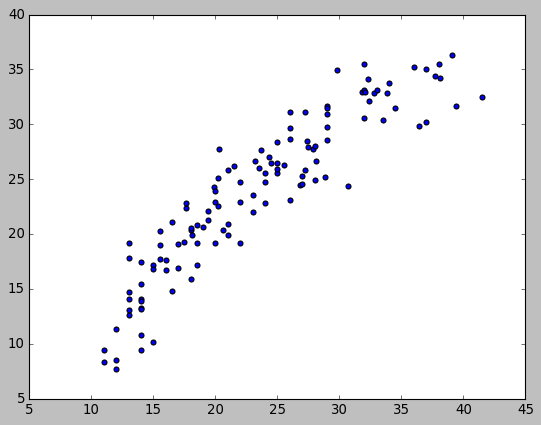

In [69]:
# since this is a regression, plot the predicted y value vs actual y values for the test data.
# A good model's prediction will be close to the actual leading to high R and R^2 values 
# plt.rcParams["figure.dpi"] = 500

plt.scatter(y_test["mpg"], y_predict);

In [70]:
# Noise in the dataset, Noise --> is the unexplained residual's and unexplained variances in the output 


In [71]:
# --------------------------------------------------ITERATION2-------------------------------------------------

In [72]:
# how do we improve the model. the r^2 is 0.844, how do we improve it.
# the independent attributes have different units and scales of measurement
# it is always a good practice to scale all he dimension using z scores or some other method 
# to address the problem of different 

In [80]:
from scipy.stats import zscore

In [84]:
X_train_scaled = X_train.apply(zscore)
X_test_scaled =  X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled =  y_test.apply(zscore)

y_test_scaled

,mpg
174,-0.695101
359,0.625787
250,-0.512008
274,-0.394305
283,-0.407383
...,...
382,1.397395
39,-1.218225
171,0.089585
271,-0.015040


In [82]:
# invoke the linear regression function and find the best fit model on training data

In [85]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [86]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.3957470005920457
The coefficient for disp is 0.13057195254437304
The coefficient for hp is -0.18704682143280707
The coefficient for wt is -0.6881521871765557
The coefficient for acc is 0.0041304710878790896
The coefficient for yr is 0.3556275988085076
The coefficient for car_type is 0.41977090750921303


In [87]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.8520553264363734e-18


In [88]:
# Intercept in this case is almost close to zero 

In [89]:
regression_model.score(X_test_scaled, y_test_scaled)

0.8460575288663481

In [90]:
mse = np.mean((regression_model.predict(X_test_scaled) - y_test_scaled)**2)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [91]:
math.sqrt(mse)

0.3923550319973631

In [94]:
y_pred = regression_model.predict(X_test_scaled)

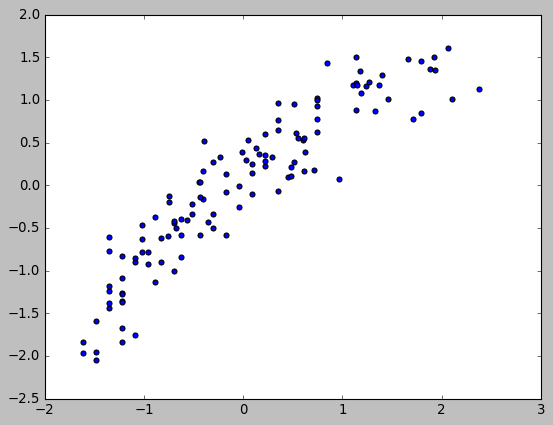

In [96]:
plt.scatter(y_test_scaled["mpg"], y_pred);

In [97]:
## here we got the same trend.
## so in short centering of the data using z-score method &  
# and building our linear regression model back will have no impact on accuraccy scores 
#  it will remove the intercept 
#  ad also coefficient will also change for all the dimensions because we are now dealing with scaled data.


In [99]:
# ----------------------------- Why the intercept dissapear when we rebuild the model on z-scores----------------------------

In [100]:
# --------------------------------------Multi-Collinearity and its hands-on----------------------------------------------------

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
vif = [variance_inflation_factor(X.values, ix) for ix in range (X.shape[1])]

In [108]:
i = 0
for column in X.columns:
    if i < 11:
        print(column, "------->", vif[i])
        i = i + 1

cyl -------> 18.667572517839513
disp -------> 20.937240857718823
hp -------> 9.263680971987108
wt -------> 11.866757544055256
acc -------> 2.4940124013444334
yr -------> 1.221522630037093
car_type -------> 6.743825695716253


In [109]:
# And here as we can see the vif for every column is very high 
# it should be b/w 1 and 5
# and here we see very high colinearity for almost every column 
# the reason is the presence of strong colinarity in the dataset